## Homework 2

In this homeowork we're going to work to fix an implementation of the Gibbs sampler we talked about in class. I've asked ChatGPT to do the whole thing for me, but the asignment was a little much for it. We're going to use this homework to fix up the holes in ChatGPT's solution, test some of the examples from class, and experiment with how well Gibbs sampling does.


### Gibbs sampling
As a reminder, here's how we implement Gibbs sampling for the motif selection in class:

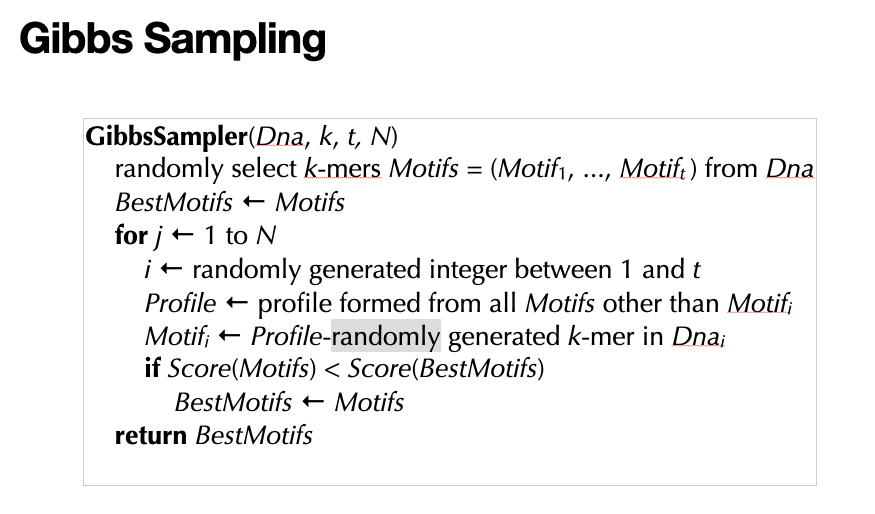

### import a python package we'll need


In [1]:

import random

# random numbers rely on a seed - if you set the seed to a specific number you get the same chain 
# of random values every time (give that the algorithm for random numbers is built to support this). 
# This is helpful if you want to play around with a random process and figure out how it works, or
# show that your results are the same as another implementation. If your code is ever having problems
# you can set the seed by uncommenting the line below:

# random.seed(0)

### Building a Gibbs sampler

First lets setup some test data from class. Here's a collection of sequences we used:

In [2]:
# our test case, from the class notes:
k_motif_example = ['TCGGGGgTTTtt',
                   'cCGGtGAcTTaC',
                   'aCGGGGATTTtC',
                   'TtGGGGAcTTtt',
                   'aaGGGGAcTTCC',
                   'TtGGGGAcTTCC',
                   'TCGGGGATTcat',
                   'TCGGGGATTcCt',
                   'TaGGGGAacTaC',
                   'TCGGGtATaaCC']

# the known consensus we'll test against
known_consensus = 'TCGGGGATTTCC'

### Build a profile 

The first thing we'll need to code is a profile builder. This function takes a set of sequences 
_t_ (like from the slides) and produces a matrix where we've counted each base at each position.
This is a two-dimensional matrix, which we'll create using a list of lists.The first index is 
the column in profile (say position 1 in all sequences), the second is the base, where 'A' is
zero, 'C' is one, 'G' is two, and 'T' is three. 

This function is a little more complicated as we're avoiding making copies of each k-mer. 
Instead we'll use the whole sequences, and we'll pass an index into the _build_profile_ function which tells 
us where the k-mer starts, and a k-mer length so we know how long the k-mers are. We also tell
this function which sub-sequence we're dropping while making the profile, as our Gibbs sampler
only uses t-1 sequences to build the profile.

For instance if we wanted to pretend that the motif example in the code box above is the whole sequence, we could
call this function with zero-offsets and a kmer length of twelve to get the profile for those
k-mers. In this example we're dropping the first sequence:

```
profile_results = build_profile(k_motif_example, [0,0,0,0,0,0,0,0,0,0], 0, 12)

profile_results # implicitly asking Jupyter to print the matrix, which will do it nicely
```

which would output:
```
[[2, 1, 0, 6],
 [2, 5, 0, 2],
 [0, 0, 9, 0],
 [0, 0, 9, 0],
 [0, 0, 8, 1],
 [0, 0, 8, 1],
 [9, 0, 0, 0],
 [1, 4, 0, 4],
 [1, 1, 0, 7],
 [1, 2, 0, 6],
 [3, 4, 0, 2],
 [0, 6, 0, 3]]
```

The first column has two As, one C, and 6 Gs, representing the 1st sublist, which is column one
in the collection. You can check the values for each column against the motif above.

### Help!

Help create and fill-in a profile building function below:

In [31]:

def build_profile(sequences, positions, exclude_seq_index, motif_len):
    # fix me!
    return profile 

profile_results = build_profile(k_motif_example, [0,0,0,0,0,0,0,0,0,0], 0, 12)

profile_results

[[2, 1, 0, 6],
 [2, 5, 0, 2],
 [0, 0, 9, 0],
 [0, 0, 9, 0],
 [0, 0, 8, 1],
 [0, 0, 8, 1],
 [9, 0, 0, 0],
 [1, 4, 0, 4],
 [1, 1, 0, 7],
 [1, 2, 0, 6],
 [3, 4, 0, 2],
 [0, 6, 0, 3]]

### get_consensus

Next we'll need a function to create a consensus sequence. This function takes a 
collection of strings, counts the nucleotides at each position, and returns a
consensus sequence as a string. For instance if we ask for the consensus sequence
of the motif above, the code:

```
print(get_consensus(k_motif_example))
```

this function should generate the following:
```
TCGGGGATTTCC
```

In [5]:

def get_consensus(strings):
    # fix me!
    return(consensus)

print(get_consensus(k_motif_example))


TCGGGGATTTCC


### choose_position

This function scores each starting motif position in a sequence according to
the provided profile matrix, and then chooses a position in the sequence 
_seq_ at random, weighted by its score. It then returns that position. This
function is a critical step from our random-start approach to Gibbs 
sampling. It's a little tricky with the calculations so we'll just use this one:

In [6]:

def choose_position(seq, profile, motif_len):
    
    # Choose a new position for a sequence based on the profile matrix
    probabilities = []
    
    for i in range(len(seq) - motif_len + 1):
        prob = 1.0
        for j in range(motif_len):
            nucleotide = seq[i + j].upper()
            if nucleotide == 'A':
                prob *= profile[j][0]
            elif nucleotide == 'C':
                prob *= profile[j][1]
            elif nucleotide == 'G':
                prob *= profile[j][2]
            elif nucleotide == 'T':
                prob *= profile[j][3]
        probabilities.append(prob)
        
    # calculate the normalized probabilities for each position 
    norm_probabilities = [p / sum(probabilities) for p in probabilities]
    
    # now use python random.choices to pick a position by the weights
    return ((random.choices(range(len(seq) - motif_len + 1), weights=norm_probabilities)[0],norm_probabilities))


### Score a motif

Like we saw in class, we want to score each motif. this means counting the differences from a consensus 
sequence for each sequence in the motif and returning that score. Help fill in this function.

In [7]:

def score_motif(motif):
    # fix me!
    return(score)

score_motif(k_motif_example)


30


### The main show

This is the main function we call, **gibbs_motif_search**. It takes the parameters:
- a set of full sequences, 
- a function to pick random starting points before iterating,
- a function to pick a random sequence to exclude when we do our update procedure
- the sequence size of the motif, and 
- the number of iterations to run. 

Why do we pass two functions, random_sequence_start_picker and _random_sequence_exclude_function_?
Often in coding we want to decouple an action from the details of how it's implemented. This is often
called _dependency injection_; here instead of just picking a random position inside the code
we call another function to do this for us. 

When we go to test this code, we can pass a function that doesn't do this randomly, and instead
generates a predefined set of starting positions. We'll use this to run the exact example we used to class
to test this code. Later we can use a true random function, feeling more confident that code works well.

In [23]:

def gibbs_motif_search(sequences,                        # a collection of sequences to search in, our 'Dna' in class
                       random_sequence_start_picker,     # a function we use to randomly pick the starting point in each sequence
                       random_sequence_exclude_function, # a function to randomly choose the sequence to exclude in each iteration
                       motif_len,                        # how long the k-mer / motif is in nucleotides
                       num_iterations                    # how many iterations we should try
                      ):
    
    # select k-mers for Motifs by randomly selecting positions in the DNA sequences
    positions = random_sequence_start_picker(sequences, motif_len)

    # Initialize the 'best motif' as the starting motif
    best_motif = [seq[pos:pos + motif_len] for seq, pos in zip(sequences, positions)]
    
    # Loop the specified number of iterations looking to improve our motif score
    for i in range(num_iterations):
    
        # Choose a random sequence to leave out of the motif search
        exclude_seq_index = random_sequence_exclude_function(len(sequences))
        
        # Build a profile matrix based on the other sequences
        profile = build_profile(sequences, positions, exclude_seq_index, motif_len)
        
        # Choose a new position for the excluded sequence based on the profile matrix
        new_pos = choose_position(sequences[exclude_seq_index], profile, motif_len)[0]
        
        # Update the positions list with the new position
        positions[exclude_seq_index] = new_pos
        
        # Update the best motif if the new motif is better than the current best motif
        new_motif = [seq[pos:pos + motif_len] for seq, pos in zip(sequences, positions)]
        
        if score_motif(new_motif) < score_motif(best_motif):
            best_motif = new_motif
           
    # Return the the consensus sequence of the best motif
    return (get_consensus(best_motif))


### Let's try testing this with a known example

We'll create the same motif we saw in class, with the uppercase letters
being the target sequence, and our starting positions hard-coded into
our fake randomization function. We'll then create two functions that 
act as fake randomization functions. These functions only have to work once, the
example in class finds the right consensus sequence **ACGT** after a single
iteration. Code it up and check!

The Gibbs sampler should return the profile matrix, the updated motif,
and the consensus sequence. The consensus should match the expected **ACGT**:

In [26]:
# the small test example from class 
small_test_from_class = [
    'ttACCTtaac',
    'gATGTctgtc',
    'ccgGCGTtag',
    'cactaACGAg',
    'cgtcagAGGT',
]

# our two fake functions, that setup the 'randomness' in the in-class data set
def class_random_sequence_start_picker(sequences, motif_len):
    return([6,3,0,1,6]) # the 'random' start positions - the red sequence

def class_random_sequence_exclude_function(size):
    return(2) # we excluded sequence two in the class example

# run Gibbs sampling on this sample data
gibbs_motif_search(small_test_from_class,
                   class_random_sequence_start_picker,
                   class_random_sequence_exclude_function,
                   4,
                   1)
    

'ACGT'

### Truly random

Now let's create the true random selection functions:

_get_random_motif_positions_ should return a list of random
starting locations, one entry for each input sequence. This start sequence
should not exceed the sequence length minus the k-mer length. 

_get_random_sequence_to_exclude_ should return a random number 
that represents the sequence to remove and resample in the Gibbs
sampling procedure. 

In [27]:
def get_random_motif_positions(sequences, motif_len):
    # fix me

def get_random_sequence_to_exclude(size):
    # fix me


### Run the true sampling

Run the sampling for 1000 iterations to see what we get...

In [ ]:
gibbs_motif_search(small_test_from_class, get_random_motif_positions, find_random_sequence_to_exclude, 4, 1000)


### Broken

We've forgotten something critical from class (or maybe you're already fixed it), and we've gotten a division by zero error. Try to go back and figure out why we're getting this error. One hint is that one example output higher up is actually incorrect, and we need to deal better with the unexpected.

# Post-fix

Fix the issue above and correct the right function. Now we should be able to run with our randomization 
functions and the Gibbs sampler to see how well we can find the correct consensus sequence using random
starting positions. Let's run the Gibbs sampler and figure out how often we get the correct answer. This answer should be **somewhere around 0.15**

In [ ]:
# a nice package that takes a list and converts it to a dictionary of the counts of each unique item
from collections import Counter

consensus_sequences = []
iteration_count = 1000

# run a 1000 iterations and record the result each time
for i in range(iteration_count):
    
    # for each iteration, run the Gibbs sampler for N=100, and record the results
    consensus_seq = gibbs_motif_search(
        small_test_from_class, 
        get_random_motif_positions, 
        get_random_sequence_to_exclude, 
        4, 
        100)
    
    consensus_sequences.append(consensus_seq)
    
# calculate how likely the ACGT pattern is with 100 Gibbs iterations run 1000 times.
all_results = Counter(consensus_sequences)

# use get to query the dictionary, which defaults to 0 if it doesn't 
# exist in the dictionary (unlikely but can happen)
acgt_rate_for_100_gibbs = all_results.get("ACGT",0)/iteration_count
print(acgt_rate_for_100_gibbs) 


### Finish it off

Try one more thing. Create a new code block that runs the Gibbs iteration count (N) above to 1000 iterations from 100. **The results should be somewhere around 0.68**. Store the results in a new variable below:
    

In [ ]:
acgt_rate_for_1000_gibbs = 0